In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import math
import torch

import importlib
import DRLPDE_nn
import DRLPDE_functions

num_plot_xdim = 128
num_plot_ydim = 128
num_plot_bdry = 64
num_plot_rand = 256

DRLPDE_param = importlib.import_module("DRLPDE_param_problem")

domain = DRLPDE_param.domain
my_bdry = DRLPDE_param.my_bdry
output_dim = DRLPDE_param.output_dim
analytic_sol = DRLPDE_param.exists_analytic_sol

boundaries = DRLPDE_functions.make_boundaries(my_bdry)

model = torch.load("savedmodels/" + 'Test' + ".pt").to('cpu')

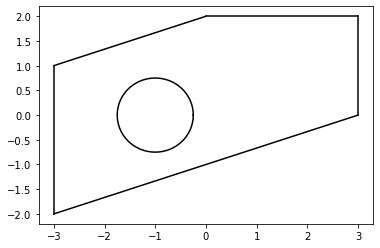

In [2]:
fig_domain, ax_domain = plt.subplots()
Xplot = []
for bdry in boundaries:
    X_each_bdry = bdry.plot_bdry(num_plot_bdry)
    Xplot.append( X_each_bdry )

    ax_domain.plot( X_each_bdry[:,0].numpy(), X_each_bdry[:,1].numpy(), '-k' )

<ipython-input-3-45f6d1cf4c94>:39: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax_model[ii].contourf(Xmesh[0].detach().numpy(),


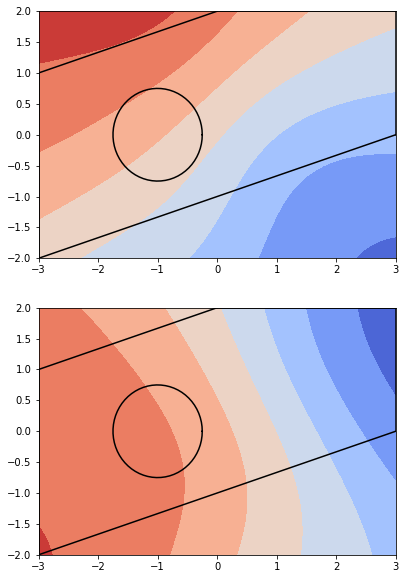

In [3]:
model = torch.load("savedmodels/" + 'Test' + ".pt").to('cpu')
        
### Plot boundaries first
fig_model, ax_model = plt.subplots(nrows=output_dim, ncols=1, figsize=[6.4, output_dim*5.0])

for ii in range(output_dim):
    for jj in range(len(Xplot)):
        ax_model[ii].plot( Xplot[jj][:,0].numpy(), Xplot[jj][:,1].numpy(), '-k' )

### Two options to decide upon
### 1. tricontourf, does not need meshgrid
### 2. contourf

method = 2

### TODO: include levels

if method == 1:
    ### Method 1
    Xplot.append( DRLPDE_functions.generate_interior_points(num_plot_rand, domain, boundaries) )
    Xplot1 = torch.cat( Xplot, dim=0).requires_grad_(True)
    Uplot = torch.split( model(Xplot1), 1, dim=1 )

    for ii in range(output_dim):
        surf = ax_model[ii].tricontourf(Xplot1[:,0].detach().numpy(), 
                                        Xplot1[:,1].detach().numpy(), 
                                        Uplot[ii][:,0].detach().numpy(), 
                                        cmap=cm.coolwarm)

if method == 2:
    ### Method 2
    Xmesh = torch.meshgrid( torch.linspace(domain[0][0], domain[0][1], num_plot_xdim ),
                             torch.linspace(domain[1][0], domain[1][1], num_plot_ydim ) )
    
    Uplot = model( torch.stack( (Xmesh[0].reshape(-1), 
                                 Xmesh[1].reshape(-1)), dim=1)).reshape(num_plot_xdim, num_plot_ydim, output_dim)

    for ii in range(output_dim):
        surf = ax_model[ii].contourf(Xmesh[0].detach().numpy(), 
                                     Xmesh[1].detach().numpy(), 
                                     Uplot[:,:,ii].detach().numpy(), 
                                        cmap=cm.coolwarm)

In [12]:
Xmesh = torch.meshgrid( torch.linspace(domain[0][0], domain[0][1], num_plot_xdim ),
                        torch.linspace(domain[1][0], domain[1][1], num_plot_ydim ) )
    
X = torch.stack( (Xmesh[0].reshape(-1), Xmesh[1].reshape(-1) ), dim=1 )

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [4]:
Xbdry = []
for bdry in boundaries:
    X_each_bdry = bdry.plot_bdry(num_plot_bdry)
    Xbdry.append( X_each_bdry )

    ax_domain.plot( X_each_bdry[:,0].numpy(), X_each_bdry[:,1].numpy(), 'k-' )

In [8]:
Xplot = torch.cat( (torch.cat( Xbdry, dim=0), 
                    DRLPDE_functions.generate_interior_points(num_plot_rand, domain, boundaries)), dim=0 )

In [6]:
Xbdry[0].shape

torch.Size([64, 2])